# my goal in this
1. get data
2. build linear model
3. used l1 norm
4. used l2 norm
5. used elastic net


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df. head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.shape

(20640, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
df[df['total_bedrooms'].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [9]:
# Fill null values in 'total_bedrooms' with the mean of the column
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)

C:\Users\farha\AppData\Local\Temp\ipykernel_14948\985197376.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)


In [10]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [11]:
df.drop('ocean_proximity',axis=1, inplace=True)

In [12]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [13]:
# Step 1: Separate features and target
inputs = df.drop('median_house_value', axis=1) # all input columns hold this
target = df['median_house_value'] # only output columns hold this 

In [14]:
# Step 2: Split data
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=42)


In [15]:
from sklearn.linear_model import LinearRegression

# create model
model = LinearRegression()


In [16]:
# train the model on training data
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# make prediction 
model_prediction = model.predict(X_test)

In [22]:
# evaluate/check accuracy
from sklearn.metrics import mean_squared_error, r2_score,root_mean_squared_error

mse = mean_squared_error(y_test,model_prediction)
r2 = r2_score(y_test,model_prediction)
rmse = root_mean_squared_error(y_test,model_prediction)
print(f"mean square error is: {mse}")
print(f"R2 score is:{r2}")
print(f"rmse is: {rmse}")

mean square error is: 5052953703.901592
R2 score is:0.6143987268246052
rmse is: 71084.13116794487


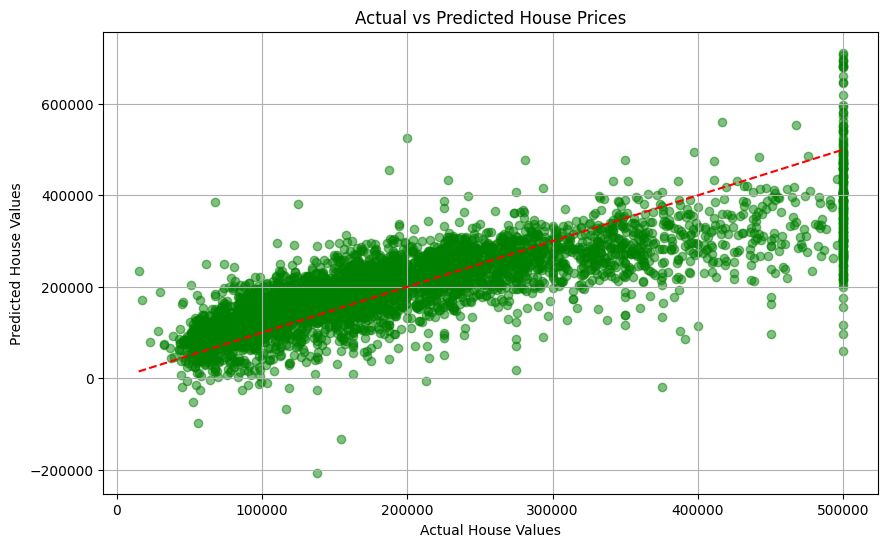

In [30]:

# Predictions on training and test sets
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# Plot test predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_preds, alpha=0.5, color='green')
plt.xlabel("Actual House Values")
plt.ylabel("Predicted House Values")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect prediction line
plt.grid(True)
plt.show()


In [32]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

# Create model
model = LinearRegression()

# KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate with cross_val_score using negative MSE
mse_scores = cross_val_score(model, inputs, target, cv=kf, scoring='neg_mean_squared_error')

# Convert negative MSE to positive
mse_scores = -mse_scores
rmse_scores = np.sqrt(mse_scores)

print("MSE Scores for each fold:", mse_scores)
print("Average MSE:", mse_scores.mean())
print("Average RMSE:", rmse_scores.mean())


MSE Scores for each fold: [5.05295370e+09 4.88094655e+09 4.70525603e+09 4.45343753e+09
 5.30100373e+09]
Average MSE: 4878719508.003008
Average RMSE: 69816.9688549184


2. adding l1 norm lasso regresssion

In [59]:
from sklearn.linear_model import Lasso
import numpy as np

# Step 1: Create the model
lasso = Lasso(alpha=1, precompute=True, positive=False, max_iter=3000, selection='random')

# Step 2: Train the model
lasso.fit(X_train, y_train)

# Step 3: Predict
y_pred = lasso.predict(X_test)

# Step 4: Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MSE: {mse}")
print(f"R2: {r2}")
print(f"RMSE: {rmse}")


MSE: 5052942556.08095
R2: 0.61439957753769
RMSE: 71084.05275503747


In [61]:
# Display the coefficients
coef = pd. Series (lasso.coef_, index=inputs.columns)
coef

longitude            -42628.680680
latitude             -42446.604774
housing_median_age     1182.861581
total_rooms              -8.188291
total_bedrooms          116.254609
population              -38.492373
households               46.351389
median_income         40538.572753
dtype: float64

In [62]:
print("Feature coefficients:", lasso.coef_)


Feature coefficients: [-4.26286807e+04 -4.24466048e+04  1.18286158e+03 -8.18829102e+00
  1.16254609e+02 -3.84923726e+01  4.63513887e+01  4.05385728e+04]


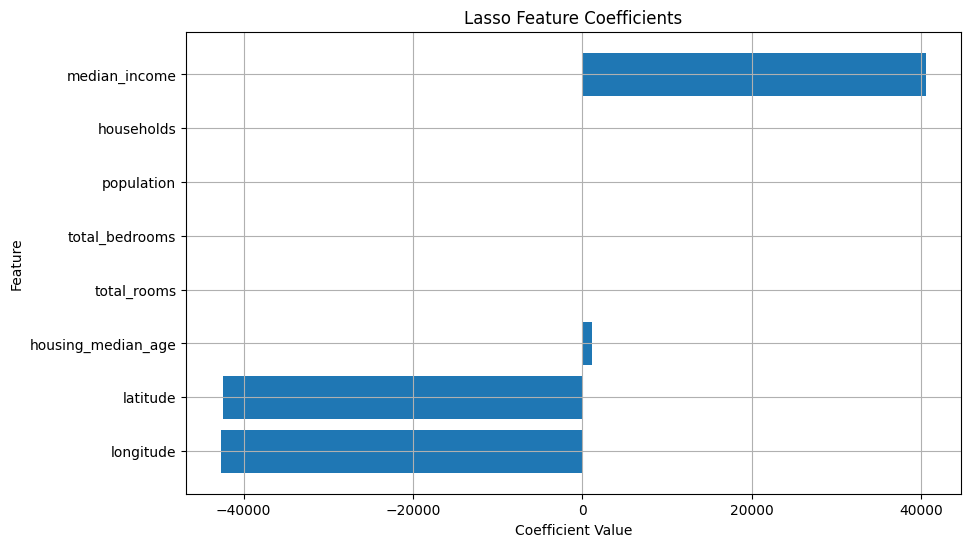

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(inputs.columns, lasso.coef_)
plt.title("Lasso Feature Coefficients")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.grid(True)
plt.show()


In [64]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(alphas=np.logspace(-2, 2, 100), cv=5)
lasso_cv.fit(X_train, y_train)
print("Best alpha:", lasso_cv.alpha_)


Best alpha: 24.770763559917114


# 3. apply l2 norm

In [69]:
from sklearn.linear_model import Ridge

# Create the Ridge model
ridge = Ridge(alpha=0.1, max_iter=3000)

# Fit the model
ridge.fit(X_train, y_train)

# Predict
y_pred_ridge = ridge.predict(X_test)

# Evaluate
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

print(f"📘 Ridge Regression Results:")
print(f"  ➤ MSE: {mse_ridge}")
print(f"  ➤ R² Score: {r2_ridge}")
print(f"  ➤ RMSE: {rmse_ridge}")


📘 Ridge Regression Results:
  ➤ MSE: 5052951061.897134
  ➤ R² Score: 0.6143989284413907
  ➤ RMSE: 71084.11258429787


In [67]:
print("Ridge coefficients:", ridge.coef_)


Ridge coefficients: [-4.26226944e+04 -4.24410116e+04  1.18296423e+03 -8.18887824e+00
  1.16246555e+02 -3.84926063e+01  4.63652583e+01  4.05389240e+04]


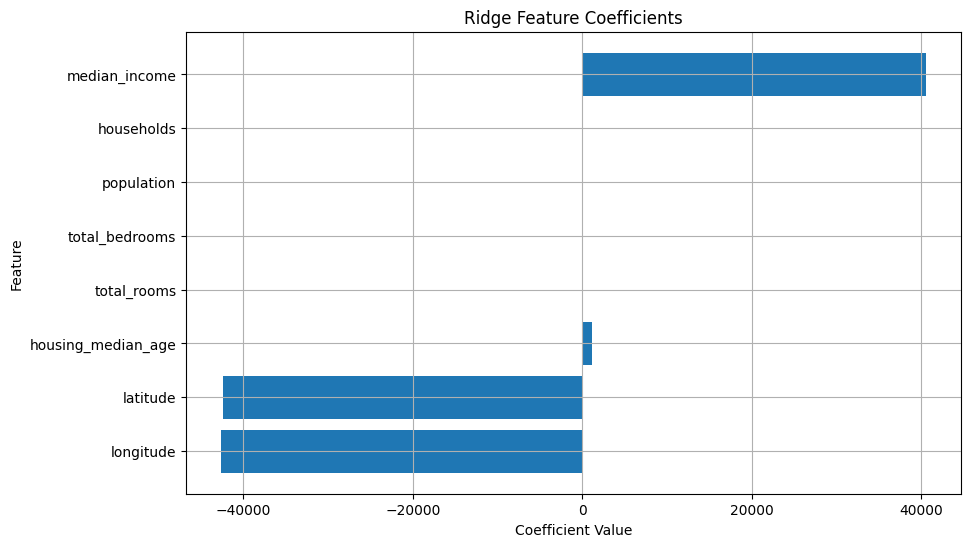

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(inputs.columns, ridge.coef_)
plt.title("Ridge Feature Coefficients")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.grid(True)
plt.show()


# 4. 🧪 Step into the Hybrid Power: Elastic Net

In [73]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Create ElasticNet model
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.4,max_iter=3000, random_state=42)

# Fit the model
elastic_net.fit(X_train, y_train)

# Predict
y_pred = elastic_net.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"📘 Elastic Net Regression Results:")
print(f"  ➤ MSE: {mse}")
print(f"  ➤ R² Score: {r2}")
print(f"  ➤ RMSE: {rmse}")


📘 Elastic Net Regression Results:
  ➤ MSE: 5058805439.774715
  ➤ R² Score: 0.6139521688438305
  ➤ RMSE: 71125.2798924174
